In [17]:
import numpy as np
import scikit_posthocs as sp # pip3 install scikit-posthocs
import scipy.stats as ss
import pandas as pd
from os import listdir
from autorank import autorank, create_report, plot_stats # pip3 install autorank
import matplotlib.pyplot as plt
import glob

#### get the data, combine different tables into 1 image-acc, 1 image-fpr, 1 rest-acc, 1 rest-fpr tables

In [68]:
files_image = np.append(glob.glob('Tables/*cifar*xlsx'), glob.glob('Tables/*mnist*xlsx'))
files_basic = np.append(glob.glob('Tables/b*basic*xlsx'), glob.glob('Tables/h*basic*xlsx'))
files_tree_svm = np.append(glob.glob('Tables/*svm*xlsx'), glob.glob('Tables/*tree*xlsx'))

In [79]:
# combine image results
dfs_acc = []
dfs_fpr = []
for f in files_image:
    df = pd.read_excel(f, engine='openpyxl', header=1)
    df = df.drop(0)
    dfs_acc.append(df.iloc[:,2:8])
    dfs_fpr.append(df.iloc[:,8:])
res_acc_img = pd.concat(dfs_acc)
# if you want to rename the columns so it looks better in the plot
res_acc_img.columns = ['BAARD (2)', 'BAARD (3)', 'FS', 'LID', "MagNet", 'RC'] 
res_fpr_img = pd.concat(dfs_fpr)
res_fpr_img.columns = res_acc_img.columns

In [70]:
# combine non-image BASIC results
# ATTENTION: this includes only the non-svm results as the others haven't been defended with LID!
dfs_acc = []
dfs_fpr = []
for f in files_basic:
    df = pd.read_excel(f, engine='openpyxl', header=1)
    df = df.drop(0)
    dfs_acc.append(df.iloc[:,2:6])
    dfs_fpr.append(df.iloc[:,6:])
res_acc_basic = pd.concat(dfs_acc)
# if you want to rename the columns so it looks better in the plot
res_acc_basic.columns = ['BAARD (2)', 'BAARD (3)', 'LID', 'RC'] 
res_fpr_basic = pd.concat(dfs_fpr)
res_fpr_basic.columns = res_acc_basic.columns

In [71]:
# here are the SVM/Tree results
dfs_acc = []
dfs_fpr = []
for f in files_tree_svm:
    df = pd.read_excel(f, engine='openpyxl', header=1)
    df = df.drop(0)
    dfs_acc.append(df.iloc[:,2:5])
    dfs_fpr.append(df.iloc[:,5:])
res_acc_tree_svm = pd.concat(dfs_acc)
# if you want to rename the columns so it looks better in the plot
res_acc_tree_svm.columns = ['BAARD (2)', 'BAARD (3)', 'RC'] 
res_fpr_tree_svm = pd.concat(dfs_fpr)
res_fpr_tree_svm.columns = res_acc_tree_svm.columns

#### Run autorank for each of them to get the plots

In [80]:
results_acc_img = autorank(res_acc_img)
results_fpr_img = autorank(res_fpr_img, order='ascending')
results_acc_basic = autorank(res_acc_basic)
results_fpr_basic = autorank(res_fpr_basic, order='ascending')
results_acc_tree_svm = autorank(res_acc_tree_svm)
results_fpr_tree_svm = autorank(res_fpr_tree_svm, order='ascending')

/home/katdost/.local/lib/python3.6/site-packages/autorank/_util.py:107: RuntimeWarning: invalid value encountered in double_scalars
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)


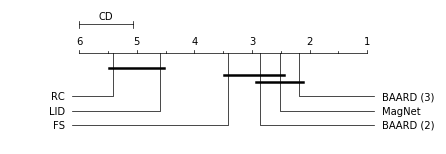

In [81]:
# accuracy for image datasets
plot_stats(results_acc_img)
plt.savefig('Plots/Nemenyi_ACC_imageData.pdf', format='pdf', dpi=1200, bbox_inches='tight')
#create_report(results_acc_img)

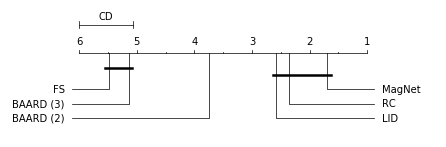

In [82]:
# FPR for image datasets
plot_stats(results_fpr_img)
plt.savefig('Plots/Nemenyi_FPR_imageData.pdf', format='pdf', dpi=1200, bbox_inches='tight')
#create_report(results_fpr_img)

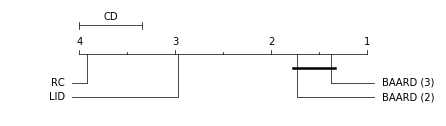

In [75]:
# accuracy for non-image datasets
plot_stats(results_acc_basic)
plt.savefig('Plots/Nemenyi_ACC_nonImageData_basic.pdf', format='pdf', dpi=1200, bbox_inches='tight')
#create_report(results_acc_rest)

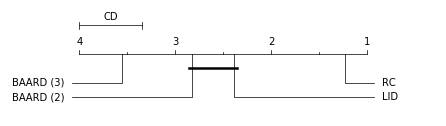

In [76]:
# FPR for non-image datasets
plot_stats(results_fpr_basic)
plt.savefig('Plots/Nemenyi_FPR_nonImageData_basic.pdf', format='pdf', dpi=1200, bbox_inches='tight')
#create_report(results_fpr_rest)

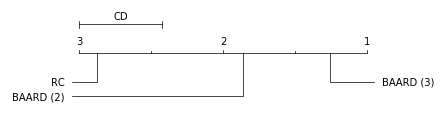

In [77]:
# accuracy for non-image datasets (here are the SVM and tree results!)
plot_stats(results_acc_tree_svm)
plt.savefig('Plots/Nemenyi_ACC_nonImageData_tree_svm.pdf', format='pdf', dpi=1200, bbox_inches='tight')
#create_report(results_acc_rest_svm)

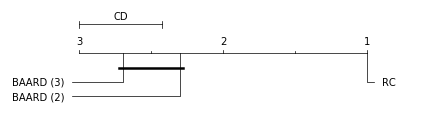

In [78]:
# FPR for non-image datasets (SVM!)
plot_stats(results_fpr_tree_svm)
plt.savefig('Plots/Nemenyi_FPR_nonImageData_tree_svm.pdf', format='pdf', dpi=1200, bbox_inches='tight')
#create_report(results_fpr_rest_svm)